<a href="https://colab.research.google.com/github/StephenJohnson-CardiffUni/ProjectNSNSmerger/blob/main/DataLoadAndHandle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JINA Fe/H data from Asplund 2009

"Throughout this review, we adopt the customary astronomical scale for logarithmic abundances where hydrogen is defined to be log (H) = 12.00, i.e. log(X) = log(NX/NH) + 12, where NX and NH are the number
densities of element X and hydrogen, respectively."

In [1]:
def JINAtxtRead(file_path):
  data = []
  with open(file_path, 'r') as file:
      for idx, line in enumerate(file):
          # Skip the second row (just contains ---- as seperators)
          if idx == 1:
              continue
          row = line.strip().split()
          data.append(row)
      return data

def SAGAtxtRead(file_path):
  data = []
  with open(file_path, 'r') as file:
      for line in file:
        row = line.strip().split()
        data.append(row)
      #rearange headers (# col is blank, Referance col has no header. Matched them up)
      data[0].append(data[0].pop(0))
  return data

Will make several plots to illustrate the trend of metals over time (Mg/Fe) and contrast with the trend of Eu/Fe.

FIrst with data from JINA

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

MgJINAdata = np.array(JINAtxtRead('/content/MgFe.txt'))
EuJINAdata = np.array(JINAtxtRead('/content/EuFe.txt'))

# print("Data Type of Column 4:", MgJINAdata[1:, 4].dtype)
# print("Data Type of Column 5:", MgJINAdata[1:, 5].dtype)
# print("Data Type of Column 4:", EuJINAdata[1:, 4].dtype)
# print("Data Type of Column 5:", EuJINAdata[1:, 5].dtype)

These arrays follow =>
           

0:'JINA_ID' 1:'Ref' 2:'Name' 3:'Simbad_Identifier' 4:'Fe/H' 5:'Mg/Fe'

A lot of the data in 4 and 5 are of dtype(<



In [3]:
##crude attempt to sanatise upper limits to point values
def sanitize_JINA_Data(array):
    sanitized_data =[]
    for value in array:

      if value.startswith('<'):  # Check for upper limits
          sanitized_data.append(float(value[1:]))  # Replace with limit value (after '<')
      else:
          sanitized_data.append(float(value)) #Convert to float for plotting

    sanitized_data = np.array(sanitized_data)
    return sanitized_data

sanitized_EuJINAdataX = sanitize_JINA_Data(EuJINAdata[1:, 4])
sanitized_EuJINAdataY = sanitize_JINA_Data(EuJINAdata[1:, 5])
sanitized_MgJINAdataX = sanitize_JINA_Data(MgJINAdata[1:, 4])
sanitized_MgJINAdataY = sanitize_JINA_Data(MgJINAdata[1:, 5])


# print("Data Type of Column 4:", sanitized_MgJINAdataX.dtype)
# print("Data Type of Column 5:", sanitized_MgJINAdataY.dtype)
# print("Data Type of Column 4:", sanitized_EuJINAdataX.dtype)
# print("Data Type of Column 5:", sanitized_EuJINAdataY.dtype)

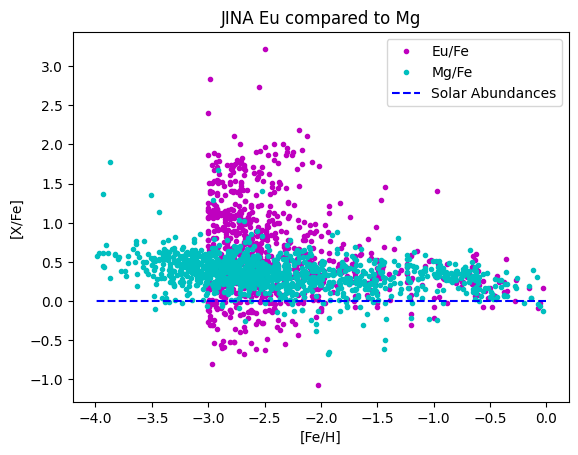

In [4]:
plt.plot(sanitized_EuJINAdataX, sanitized_EuJINAdataY, "m.", label="Eu/Fe")
plt.plot(sanitized_MgJINAdataX, sanitized_MgJINAdataY,"c.", label="Mg/Fe")
plt.plot(np.linspace(0,-4,10),np.linspace(0,0,10),"b--", label="Solar Abundances")

plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))

plt.xlabel("[Fe/H]")
plt.ylabel("[X/Fe]")

plt.title("JINA Eu compared to Mg")

plt.show()



In [5]:
SAGAdata1 = SAGAtxtRead('/content/cgisess_331a7d1c4c4773cf858cc91d7122c0d5_CEMP-no_RGB.dat')
SAGAdata2 = SAGAtxtRead('/content/cgisess_331a7d1c4c4773cf858cc91d7122c0d5_CEMP-s_MS.dat')
SAGAdata3 = SAGAtxtRead('/content/cgisess_331a7d1c4c4773cf858cc91d7122c0d5_CEMP-s_RGB.dat')
SAGAdata4 = SAGAtxtRead("/content/cgisess_331a7d1c4c4773cf858cc91d7122c0d5_Crich_MS.dat")
SAGAdata5 = SAGAtxtRead('/content/cgisess_331a7d1c4c4773cf858cc91d7122c0d5_Crich_RGB.dat')
SAGAdata6 = SAGAtxtRead('/content/cgisess_331a7d1c4c4773cf858cc91d7122c0d5_EMP_MS.dat')
SAGAdata7 = SAGAtxtRead('/content/cgisess_331a7d1c4c4773cf858cc91d7122c0d5_EMP_RGB.dat')
SAGAdata8 = SAGAtxtRead('/content/cgisess_331a7d1c4c4773cf858cc91d7122c0d5_MP.dat')


In [8]:
plt.plot(SAGAdata1[1:,0],SAGAdata1[1:,1])



plt.show()

TypeError: list indices must be integers or slices, not tuple

In [9]:
print(SAGAdata1[1:,0])

TypeError: list indices must be integers or slices, not tuple